# Customer analysis in marketing campaigns

In this exercise, you work for a consulting firm as data scientist. In this scenario, your client is the marketing team of a grocery store. They would like to find which are the ideal customers according to the results of the last marketing campaigns. Your analysis will be helpful to adapt and modify products according to the different needs and behavior of their customers.

You dispose of a dataset from the mall dataset with several features:


People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if customer complained in the last 2 years, 0 otherwise

Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

- NumWebPurchases: Number of purchases made through the company’s web site
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s web site in the last month

'Z_CostContact' and 'Z_Revenue' contains constant value across all the observations and therefore they will not contribute anything in the analysis.

You have two days to do this study

In [2]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn import set_config; set_config(display='diagram') # Pour visualiser 

In [16]:
campaign_df_raw = pd.read_csv('data/marketing_campaign.csv', sep="\t")
campaign_df = campaign_df_raw


#Changement date naissance en age
campaign_df['Year_Birth'] = campaign_df['Year_Birth'
                                       ].apply(pd.to_datetime)
a = campaign_df['Year_Birth']
b = datetime.datetime.today()
campaign_df['age'] = b-a 
campaign_df['age'] = campaign_df['age'].astype('timedelta64[D]')
campaign_df['age'] = round(campaign_df['age'] / 365).astype(int)
campaign_df = campaign_df.drop(['Year_Birth'], axis=1)


#changer format Dt_Customer
campaign_df['Dt_Customer'] = campaign_df['Dt_Customer'].apply(pd.to_datetime)
date_format = "%m/%d/%Y"
a = campaign_df['Dt_Customer']
b = datetime.datetime.today()
campaign_df['enrollment'] = b-a
campaign_df['enrollment'] = campaign_df['enrollment'].astype('timedelta64[D]')
campaign_df['enrollment'] = campaign_df['enrollment']


#Drop ID
campaign_df = campaign_df.drop(['ID', 'Z_CostContact', 'Z_Revenue', 'Dt_Customer'], axis=1)

#Drop duplicates
campaign_df = campaign_df.drop_duplicates()

#Changer l'ordre colonnes
new_order = [24,0,1,2,3,4,25,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
campaign_df = campaign_df[campaign_df.columns[new_order]]

campaign_df = campaign_df.reset_index()

#Encoder Marital et Education
ohe = OneHotEncoder(handle_unknown='ignore')
Marital_status = pd.DataFrame(ohe.fit_transform(campaign_df[['Marital_Status']]).toarray())
Marital_status.columns = ohe.get_feature_names(['Marital_Status'])
campaign_df.drop(['Marital_Status'] ,axis=1, inplace=True)
campaign_df = pd.concat([campaign_df, Marital_status], axis=1)

Education = pd.DataFrame(ohe.fit_transform(campaign_df[['Education']]).toarray())
Education.columns = ohe.get_feature_names(['Education'])
campaign_df.drop(['Education'],axis=1, inplace=True)
campaign_df = pd.concat([campaign_df, Education], axis=1)
campaign_df

#KNN imputer
imputer = KNNImputer(n_neighbors=2)
campaign_df = pd.DataFrame(imputer.fit_transform(campaign_df), columns=campaign_df.columns)


#Changer type colonne Income
campaign_df = campaign_df.astype(int)
campaign_df = campaign_df.drop(['index'], axis=1)


campaign_df = campaign_df[campaign_df['Income']<666665]
campaign_df

,age,Income,Kidhome,Teenhome,enrollment,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,52,58138,0,0,3468,58,635,88,546,172,...,0,1,0,0,0,0,0,1,0,0
1,52,46344,1,1,2622,38,11,1,6,2,...,0,1,0,0,0,0,0,1,0,0
2,52,71613,0,0,2969,26,426,49,127,111,...,0,0,1,0,0,0,0,1,0,0
3,52,26646,1,0,2562,26,11,4,20,10,...,0,0,1,0,0,0,0,1,0,0
4,52,58293,1,0,2818,94,173,43,118,46,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2052,52,26816,0,0,3338,50,5,1,6,3,...,0,1,0,0,0,0,0,1,0,0
2054,52,61223,0,1,3038,46,709,43,182,42,...,1,0,0,0,0,0,0,1,0,0
2055,52,56981,0,0,2812,91,908,48,217,32,...,0,0,0,0,0,0,0,1,0,0
2056,52,69245,0,1,2813,8,428,30,214,80,...,0,0,1,0,0,0,0,0,1,0


In [71]:
campaign_df_raw['Education'].value_counts()
campaign_df_raw['Marital_Status'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

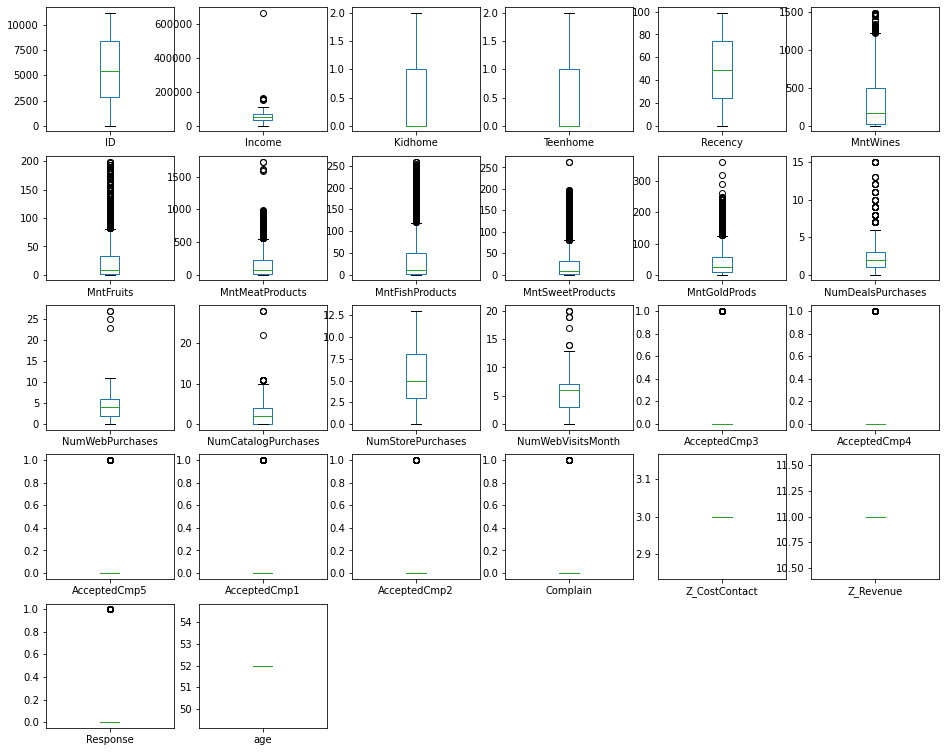

In [79]:
campaign_df_raw.plot(kind='box', subplots=True, layout=(6, 6), figsize = (16, 16));

# EDA

# Customer Segmentation

# Conlusions